In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.covariance import empirical_covariance 
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('airfoil_self_noise.txt', sep = '\t',)

cols = ['frequency','angle', 'chord length','velocity', 'displacement','sound pressure']

data.columns = cols

In [40]:
X = data[cols[0:-1]]
y = data[cols[-1]]
np.shape(X)

(1502, 5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
np.shape(X_train)

(1006, 5)

In [42]:
models_to_test = {}
models_to_test['RF'] = [RandomForestRegressor(),{'n_estimators':[100,200], 'max_features':[2,3] }]

In [43]:
models_to_test

{'RF': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False),
  {'max_features': [2, 3], 'n_estimators': [100, 200]}]}

In [44]:
for i in models_to_test.keys():
    grid_search = GridSearchCV(models_to_test[i][0], models_to_test[i][1],n_jobs=-1, cv = 3).fit(X_train,y_train)
    
    
    

In [45]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y_pred)

0.9274674864418077

In [48]:
#covariance
covariance = empirical_covariance(X)


In [49]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

for i in range (1,7):
    lr = LinearRegression()
    poly = PolynomialFeatures(i)
    Xtrain_poly = poly.fit_transform(X_train)
    lr.fit(Xtrain_poly,y_train)
    Xtest_poly = poly.fit_transform(X_test)
    score = lr.score(Xtest_poly,y_test)
    print(score)




0.4924224016174363
0.6185996326405863
0.7221315761968126
0.743255649857566
0.6796287746963279
0.46896297239852136


In [50]:
X_4= X = data[cols[0:-2]]
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.33, random_state=42)
for i in range (1,7):
    lr = LinearRegression()
    poly = PolynomialFeatures(i)
    Xtrain_poly = poly.fit_transform(X_train)
    lr.fit(Xtrain_poly,y_train)
    Xtest_poly = poly.fit_transform(X_test)
    score = lr.score(Xtest_poly,y_test)
    print(score)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

0.461565283029728
0.5429249323575225
0.6796508244006491
0.6833717222430175
0.6586770729745719
0.23248990676524664


In [51]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.2))
print(X.shape)
X_remove_low_variance = sel.fit_transform(X)
print (X_remove_low_variance.shape)
X_train, X_test, y_train, y_test = train_test_split(X_remove_low_variance, y, test_size=0.33, random_state=42)

(1502, 4)
(1502, 3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


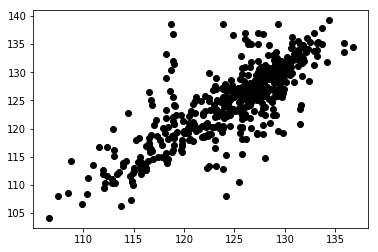

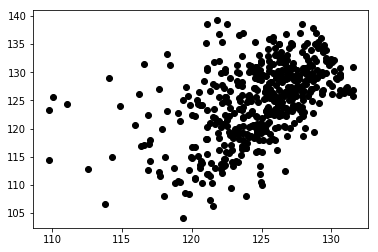

In [57]:
def evaluate_model(list):
    model_name = list[0]
    model = list[1]
    model_parameters = list[2]
    grid_search = GridSearchCV(model, model_parameters,n_jobs=-1,cv=3).fit(X_train,y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    plt.plot(y_pred,y_test,'o',color='black')
    plt.show()
    
    
models_to_test = {}
models_to_test['RF'] = ['Random Forrest',RandomForestRegressor(),{'n_estimators':[100,200], 'max_features':[2,3] }] 
models_to_test['LR'] = ['Linear Regression',LinearRegression(),{}]
for i in models_to_test.keys():
    evaluate_model(models_to_test[i])